# Subscription Retention Rate
## Goal
Subscriptions are a great business model. There are so many advantages for businesses in having subscribers compared to single purchase users: revenue by customer is much higher, it is possible to cross-sell to the subscribers, future revenue is easily predictable, there is a significant cost (time/effort/etc.) for the customer in canceling the subscription, etc.
It is no surprise then that so many companies have subscription business models (or try very hard to come up with one!).
The goal of this challenge is to model subscription retention rate.
## Challenge Description
Company XYZ started a subscription model in January, 2015. You get hired as a first data scientist at the end of August and, as a first task, you are asked to help executives understand how the subscription model is doing.
Therefore, you decide to pull data from all the users who subscribed in January and see, for each month, how many of them unsubscribed. In particular, your boss is interested in:
A model that predicts monthly retention rate for the different subscription price points
Based on your model, for each price point, what percentage of users is still subscribed after at least 12 months?
How do user country and source affect subscription retention rate? How would you use these findings to improve the company revenue?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('./subscription.csv')

In [3]:
df.shape

(500000, 7)

In [4]:
df.isna().any()

user_id                      False
subscription_signup_date     False
subscription_monthly_cost    False
country                      False
source                       False
billing_cycles               False
is_active                    False
dtype: bool

In [5]:
df.duplicated().any()

False

In [6]:
np.unique(df['subscription_signup_date'])

array(['January, 2015'], dtype=object)

In [7]:
df.describe()

,user_id,subscription_monthly_cost,billing_cycles,is_active
count,500000.000000,500000.000000,500000.000000,500000.000000
mean,250000.500000,48.469620,2.384970,0.099998
std,144337.711634,19.570745,2.254952,0.299998
min,1.000000,29.000000,1.000000,0.000000
25%,125000.750000,29.000000,1.000000,0.000000
50%,250000.500000,49.000000,1.000000,0.000000
75%,375000.250000,49.000000,3.000000,0.000000
max,500000.000000,99.000000,8.000000,1.000000


In [8]:
df.head()

,user_id,subscription_signup_date,subscription_monthly_cost,country,source,billing_cycles,is_active
0,1459,"January, 2015",29,Spain,ads,4,0
1,12474,"January, 2015",49,France,ads,5,0
2,12294,"January, 2015",49,Germany,ads,2,0
3,3878,"January, 2015",49,China,ads,1,0
4,9567,"January, 2015",49,UK,ads,5,0


In [9]:
df.groupby('subscription_monthly_cost')['user_id'].count()

subscription_monthly_cost
29    146362
49    300397
99     53241
Name: user_id, dtype: int64

In [10]:
df.groupby('is_active')['billing_cycles'].mean()

is_active
0    1.761092
1    8.000000
Name: billing_cycles, dtype: float64

Text(0.5, 1.0, 'Average Billing Cycles')

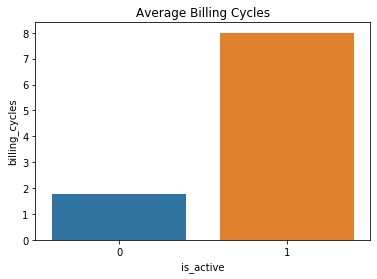

In [11]:
sns.barplot(x='is_active',y='billing_cycles',data=df)
plt.title('Average Billing Cycles')

Text(0.5, 1.0, 'Average Billing Cycles by Cost')

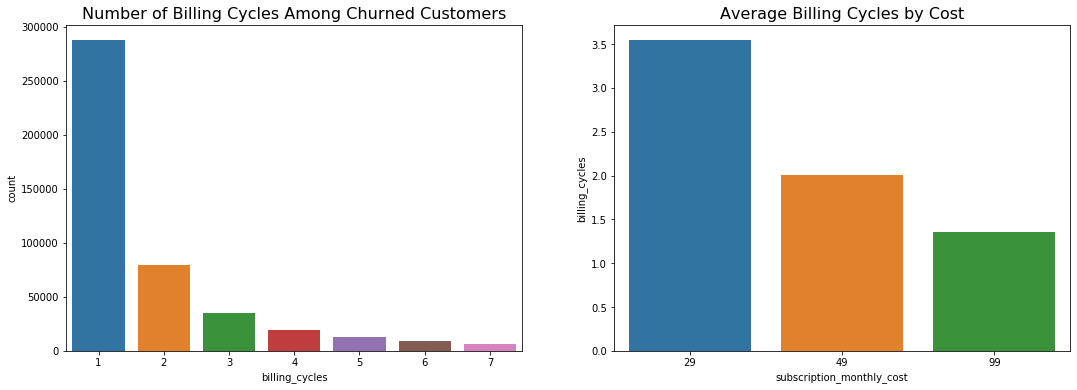

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='billing_cycles',data=df.loc[df['is_active']==0]['billing_cycles'].reset_index(),ax=ax[0])
ax[0].set_title('Number of Billing Cycles Among Churned Customers', fontsize=16)
sns.barplot(y='billing_cycles',x='subscription_monthly_cost',data=df.groupby('subscription_monthly_cost')['billing_cycles'].mean().reset_index(), ax=ax[1])
ax[1].set_title('Average Billing Cycles by Cost', fontsize=16)

Text(0.5, 1.0, 'Average Billing Cycles by Source')

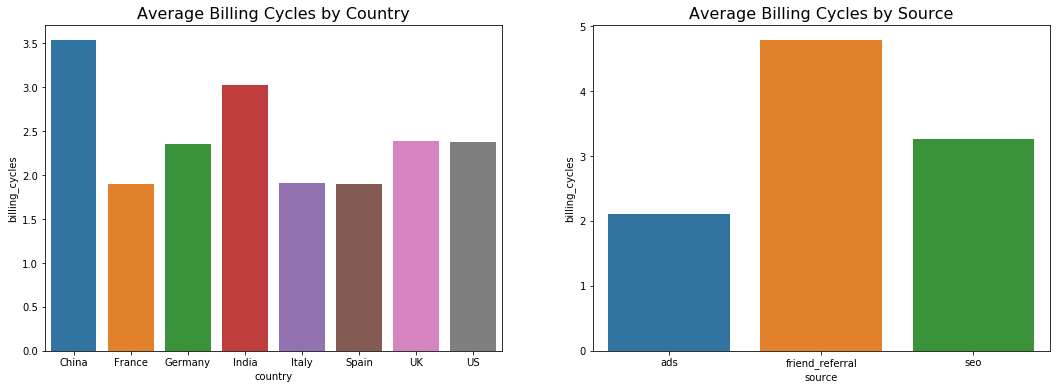

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.barplot(y='billing_cycles',x='country',data=df.groupby('country')['billing_cycles'].mean().reset_index(),ax=ax[0])
ax[0].set_title('Average Billing Cycles by Country', fontsize=16)
sns.barplot(y='billing_cycles',x='source',data=df.groupby('source')['billing_cycles'].mean().reset_index(),ax=ax[1])
ax[1].set_title('Average Billing Cycles by Source', fontsize=16)

## Total Churn

In [14]:
# Total
churn = df.groupby(['billing_cycles'])['user_id'].count().cumsum(skipna = False).reset_index()
churn.columns=['billing_cycles','#total_churn']
churn['#remain'] = churn.apply(lambda x: df.shape[0] - x['#total_churn'],axis=1)
churn.drop(churn.tail(1).index,inplace=True)
churn['#churn_this_period_total'] = df.groupby(['billing_cycles'])['user_id'].count().reset_index().iloc[:7,:]['user_id']/ churn['#remain']
churn['retention_rate_total'] = churn['#remain'] / df.shape[0]

# Cost == 29

df_29 = df.loc[df['subscription_monthly_cost'] == 29]
churn_29 = df_29.groupby(['billing_cycles'])['user_id'].count().cumsum(skipna = False).reset_index()
churn_29.columns=['billing_cycles','#total_churn']
churn_29['#remain'] = churn_29.apply(lambda x: df_29.shape[0] - x['#total_churn'],axis=1)
churn_29.drop(churn_29.tail(1).index,inplace=True)
churn_29['#churn_this_period_29'] = df_29.groupby(['billing_cycles'])['user_id'].count().reset_index().iloc[:7,:]['user_id'] /churn_29['#remain']
churn_29['retention_rate_29'] = churn_29['#remain'] / df_29.shape[0]

# Cost == 49

df_49 = df.loc[df['subscription_monthly_cost'] == 49]
churn_49 = df_49.groupby(['billing_cycles'])['user_id'].count().cumsum(skipna = False).reset_index()
churn_49.columns=['billing_cycles','#total_churn']
churn_49['#remain'] = churn_49.apply(lambda x: df_49.shape[0] - x['#total_churn'],axis=1)
churn_49.drop(churn_49.tail(1).index,inplace=True)
churn_49['#churn_this_period_49'] = df_49.groupby(['billing_cycles'])['user_id'].count().reset_index().iloc[:7,:]['user_id']/ churn_49['#remain']
churn_49['retention_rate_49'] = churn_49['#remain'] / df_49.shape[0]

# Cost == 99

df_99 = df.loc[df['subscription_monthly_cost'] == 99]
churn_99 = df_99.groupby(['billing_cycles'])['user_id'].count().cumsum(skipna = False).reset_index()
churn_99.columns=['billing_cycles','#total_churn']
churn_99['#remain'] = churn_99.apply(lambda x: df_99.shape[0] - x['#total_churn'],axis=1)
churn_99.drop(churn_99.tail(1).index,inplace=True)
churn_99['#churn_this_period_99'] = df_99.groupby(['billing_cycles'])['user_id'].count().reset_index().iloc[:7,:]['user_id']/ churn_99['#remain']
churn_99['retention_rate_99'] = churn_99['#remain'] / df_99.shape[0]

In [34]:
churn['log'] = np.log(churn['retention_rate_total'])
churn_29['log'] = np.log(churn_29['retention_rate_29'])
churn_49['log'] = np.log(churn_49['retention_rate_49'])
churn_99['log'] = np.log(churn_99['retention_rate_99'])

Text(0.5, 1.0, 'After Log Retention Rate During the Period')

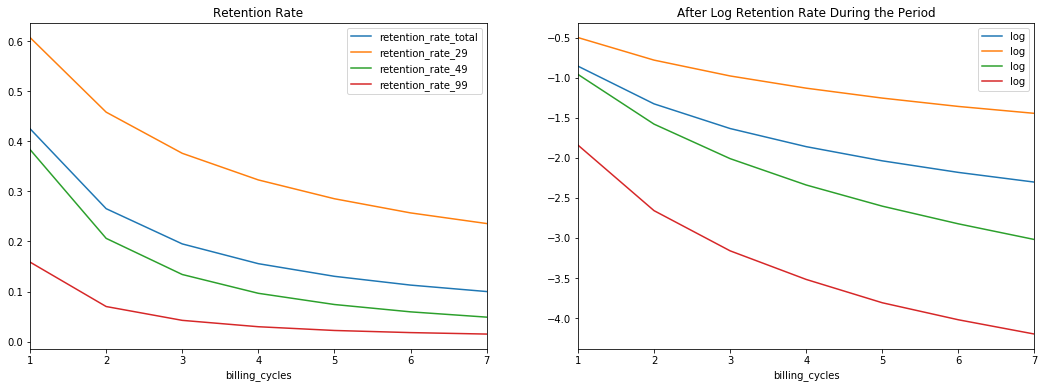

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
churn.plot(x='billing_cycles',y='retention_rate_total',ax=ax[0])
churn_29.plot(x='billing_cycles',y='retention_rate_29',ax=ax[0])
churn_49.plot(x='billing_cycles',y='retention_rate_49',ax=ax[0])
churn_99.plot(x='billing_cycles',y='retention_rate_99',ax=ax[0])
ax[0].set_title('Retention Rate')
churn.plot(x='billing_cycles',y='log',ax=ax[1])
churn_29.plot(x='billing_cycles',y='log',ax=ax[1])
churn_49.plot(x='billing_cycles',y='log',ax=ax[1])
churn_99.plot(x='billing_cycles',y='log',ax=ax[1])
ax[1].set_title('After Log Retention Rate During the Period')


In [44]:
df_29

,user_id,subscription_signup_date,subscription_monthly_cost,country,source,billing_cycles,is_active
0,1459,"January, 2015",29,Spain,ads,4,0
7,7341,"January, 2015",29,US,ads,8,1
14,5209,"January, 2015",29,UK,ads,2,0
18,3054,"January, 2015",29,China,ads,5,0
22,11799,"January, 2015",29,Spain,ads,1,0
...,...,...,...,...,...,...,...
499986,497451,"January, 2015",29,Spain,seo,1,0
499988,481681,"January, 2015",29,US,ads,8,1
499995,496962,"January, 2015",29,Spain,ads,2,0
499996,480669,"January, 2015",29,Italy,seo,1,0


## Model Building

In [37]:
import sklearn

In [38]:
country = pd.get_dummies(df['country'])
source = pd.get_dummies(df['source'])

X = pd.concat((country,source),axis=1)

In [39]:
X['subscription_monthly_cost'] = df['subscription_monthly_cost']

In [40]:
X

,China,France,Germany,India,Italy,Spain,UK,US,ads,friend_referral,seo,subscription_monthly_cost
0,0,0,0,0,0,1,0,0,1,0,0,29
1,0,1,0,0,0,0,0,0,1,0,0,49
2,0,0,1,0,0,0,0,0,1,0,0,49
3,1,0,0,0,0,0,0,0,1,0,0,49
4,0,0,0,0,0,0,1,0,1,0,0,49
...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0,0,0,0,0,1,0,0,1,0,0,29
499996,0,0,0,0,1,0,0,0,0,0,1,29
499997,0,0,0,0,0,0,1,0,1,0,0,29
499998,0,0,1,0,0,0,0,0,1,0,0,49


In [41]:
y = churn['log']

In [43]:
y

0   -0.855073
1   -1.325854
2   -1.633833
3   -1.859991
4   -2.037057
5   -2.181448
6   -2.302605
Name: log, dtype: float64

In [1]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
lr.predict(X_test)

array([3.01699829, 2.64950562, 2.11856079, ..., 0.62002563, 1.61930847,
       2.11856079])

In [25]:
sklearn.metrics.mean_squared_error(lr.predict(X_test),y_test)

4.114466506203141

In [26]:
lr.coef_

array([-1.79427374e+10, -1.79427374e+10, -1.79427374e+10, -1.79427374e+10,
       -1.79427374e+10, -1.79427374e+10, -1.79427374e+10, -1.79427374e+10,
       -5.17114712e+10, -5.17114712e+10, -5.17114712e+10, -3.02627299e-02])

In [27]:
import statsmodels.api as sm
gaussian_model = sm.GLM(y_train, X_train, family=sm.families.Gaussian())

gaussian_model_results = gaussian_model.fit()

print(gaussian_model_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         billing_cycles   No. Observations:               400000
Model:                            GLM   Df Residuals:                   399989
Model Family:                Gaussian   Df Model:                           10
Link Function:               identity   Scale:                          4.0957
Method:                          IRLS   Log-Likelihood:            -8.4956e+05
Date:                Sun, 01 Dec 2019   Deviance:                   1.6382e+06
Time:                        20:28:27   Pearson chi2:                 1.64e+06
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
China                 